In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt # set figure size and font
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 18

%load_ext autoreload
%autoreload 2

# Dry demo (from existing data)
## 1-qubit circuit
### Measuring 0 or 1 -> are we detecting a photon?
What does the output look like if we send a single qubit through this interferometer circuit: <br>
(circuit diagram) <br>
For each data point, we ran this experiment with 1024 shots (1 qubit at a time) and counted how many 0's and 1's we measured at the output. We repeated this experiment a few times (a total of 5 trials) for each value of $\phi$.

In [18]:
# Load existing data
num0 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_0s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num1 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_1s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))

`num0` and `num1` correspond to the number of times we measure 0 or 1 at the circuit output. Both `num0` and `num1` are 2D arrays with 13 rows and 5 columns. Each row corresponds to a value of $\phi$ ranging from 0 to $2\pi$ radians (or 0 to 360 degrees, if you like). <br>
This is what the top row ($\phi=0$) of `num1` looks like:

In [19]:
num1[0, :]

array([10.,  6.,  4.,  6.,  7.])

In [62]:
# the sum of num1 + num0 is always equal to 1024 (total number of shots)
num0[0, :]

array([1014., 1018., 1020., 1018., 1017.])

This means that at $\phi=0$ (no gravitational wave), when we sent 1024 photons through the interferometers, we **barely detected any photons** at the output. On the other hand, at $\phi=\pi=180^\circ$, the data look very different -- most photons are detected!

In [20]:
num1[6, :]

array([964., 959., 959., 977., 950.])

### Let's plot the data!
To better see the trends in `num0` and `num1`, we can plot both values as a function of $\phi$. Since we have 5 data points at each value of $\phi$, we can take the average from 5 trials

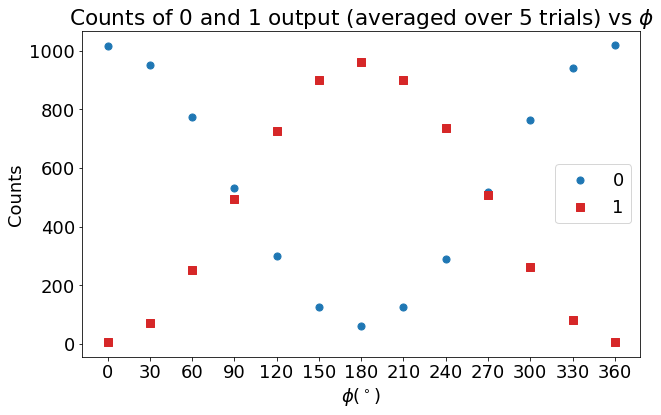

In [60]:
phi = np.linspace(0, 360, 13)
mean0 = np.mean(num0, axis=1) # averaged over 5 trials at each phi
mean1 = np.mean(num1, axis=1) # averaged over 5 trials at each phi

fig, ax = plt.subplots()
plt.scatter(phi, mean0, label="0", s=50)
plt.scatter(phi, mean1, label="1", s=50, color="C3", marker="s")
plt.legend()
ax.set_ylabel("Counts")
ax.set_xlabel("$\phi (^\circ)$")
plt.xticks(phi)
plt.title("Counts of 0 and 1 output (averaged over 5 trials) vs $\phi$")
plt.show()

Here we used 1024 shots, but this number can change. Let's convert our results into probabilities (divide `num0` and `num1` by 1024) and see how well they agree with the theoretical values $\cos^2{(\phi/2)}$ and $\sin^2{(\phi/2)}$ that we calculated.

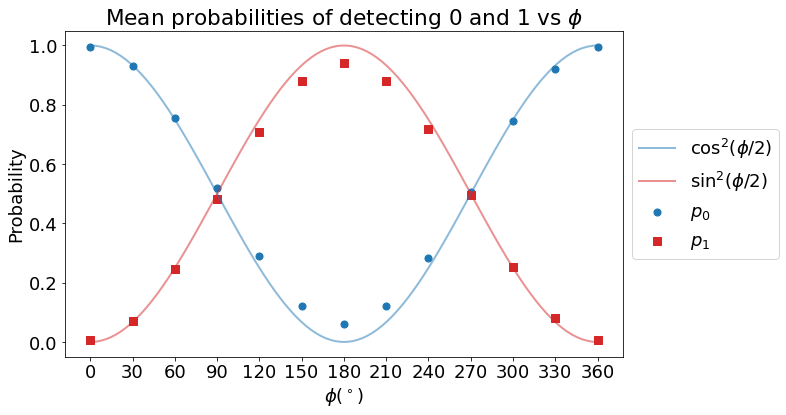

In [64]:
phi = np.linspace(0, 360, 13)
p0 = np.mean(num0, axis=1) / 1024 # calculate probability p0
p1 = np.mean(num1, axis=1) / 1024 # calculate probability p1

fig, ax = plt.subplots()
plt.scatter(phi, p0, label="$p_0$", s=50)
plt.scatter(phi, p1, label="$p_1$", s=50, color="C3", marker="s")

# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
phi_deg = np.rad2deg(phi_rad)
plt.plot(phi_deg, np.cos(phi_rad/2)**2, lw=2, alpha=0.5, label="$\cos^2{(\phi/2)}$")
plt.plot(phi_deg, np.sin(phi_rad/2)**2, lw=2, alpha=0.5, color="C3", label="$\sin^2{(\phi/2)}$")

ax.set_ylabel("Probability")
ax.set_xlabel("$\phi (^\circ)$")
plt.xticks(phi)
plt.title("Mean probabilities of detecting 0 and 1 vs $\phi$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### What do we see from the data?
1. At $\phi=0, 2\pi$ (no gravitational wave), $p_1$ is near zero whereas $p_0$ is near maximum. This means most photons do not reach the detector!
2. At other values of $\phi$ (there is gravitational wave!), some photons will reach the detector.
3. Remember that total probability $p_0 + p_1 = 1$
3. Because the probabilities $p_0, p_1$ depend on $\phi$, we can them to "guess" the value of $\phi$ ($\phi$ is unknown for a real detection at LIGO). Let's try this now!

## Can we guess $\phi$ from experimental data?
Before we proceed, let's define a new parameter that combines $p_0$ and $p_1$! We'll call it $P$ for polarization and let $P = p_1 - p_0$ define the difference between the two. Theoretically, $P = \sin^2{(\phi/2)} - \sin^2{(\phi/2)} = -\cos{\phi}$ (you can check this!). <br>
Similar to previously, we can plot the polarization vs $\phi$. We also plot the slope $dP/d\phi = \sin{\phi}$. This slope tells us where the data (P) are more or less sensitive to a change in $\phi$.

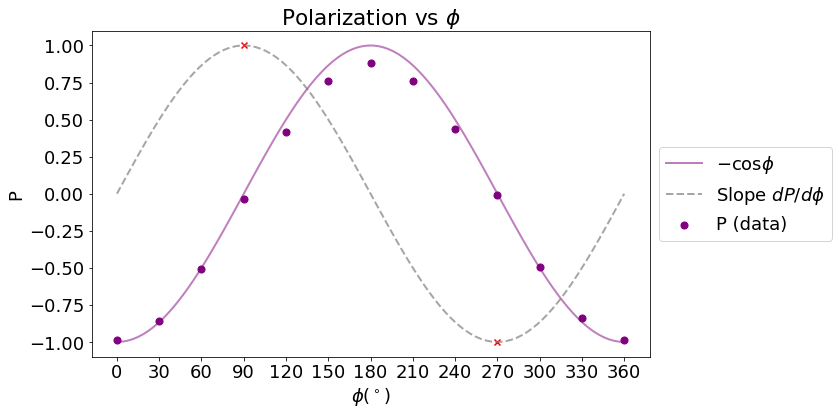

In [80]:
P = p1 - p0
phi = np.linspace(0, 360, 13)

fig, ax = plt.subplots()
# plot polarization data
plt.scatter(phi, P, label="P (data)", s=50, color="purple")

# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
phi_deg = np.rad2deg(phi_rad)
plt.plot(phi_deg, -np.cos(phi_rad), lw=2, alpha=0.5, label="$-\cos{\phi}$", color="purple")

# plot slope
plt.plot(phi_deg, np.sin(phi_rad), lw=2, alpha=0.7, label="Slope $dP/d\phi$", color="grey", linestyle="dashed")
# indicate where slope is maximum
extr_x = [90, 270]
extr_y = [1, -1]
plt.scatter(extr_x, extr_y, color="r", marker="x")

ax.set_ylabel("P")
ax.set_xlabel("$\phi (^\circ)$")
plt.xticks(phi)
plt.title("Polarization vs $\phi$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Before we play with another dataset, let's observe this plot!
1. The red crosses mark where $P$ is the most sensitive to $\phi$. At these points, $P=0$.

# IBM Quantum demo

Import standard Qiskit libraries (to interface with IBM Quantum computers)

In [ ]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, \
        ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# Loading your IBM Q account(s)
provider = IBMQ.load_account()